Deep Neural Network (DNN) - MNIST Example
=========================================
Deep Neural Network (DNN) with Tensor Flow **(Keras - FNN)**


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import deepmods.notebook as ooo
import logging

ooo.init(id='14.2.1', hide_warning=True, save_figs=True)


Deepmod by pjluc 2019
  Version          : 0.4.1
  Run time         : Sunday 29 September 2019, 09:03:30
  Run directory    : ./run/lab-14.2.1
  Save figs        : True
  Matplotlib style : deepmods/talk.mplstyle
  Hide warning     : True

TensorFlow version :  1.14.0
Keras version      :  2.2.4-tf

Init done.


## Retrieve data

In [2]:
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test  = x_test  / 255.0

x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test  :  (10000, 28, 28)
y_test  :  (10000,)


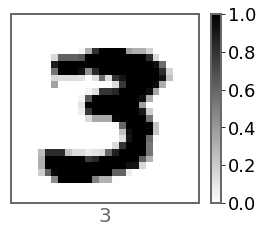

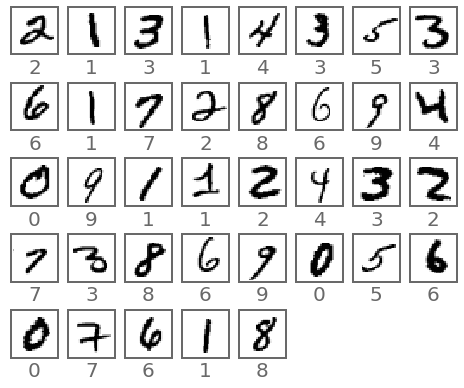

In [3]:
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

ooo.plot_images(x_train.reshape(-1,28,28),y_train, [27],  x_size=5,y_size=5, colorbar=True,save_as="One-digits", cm=matplotlib.cm.binary)
ooo.plot_images(x_train.reshape(-1,28,28),y_train, range(5,42), columns=8, save_as="Many-digits", cm=plt.cm.binary)

## Create model

In [4]:
hidden1     = 200
hidden2     = 100

batch_size  = 512
num_classes =  10
epochs      =  14



In [5]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense( hidden1, activation=tf.nn.relu),
    keras.layers.Dense( hidden2, activation=tf.nn.relu),
    keras.layers.Dense( 10,  activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tensorboard = TensorBoard(log_dir=ooo.get_log_dir())

log dir is         : ./run/lab-14.2.1/log/2019-09-29_09h03m34s
To run TensorBoard : # tensorboard --logdir="./run/lab-14.2.1/log"


## Run it

In [6]:
history = model.fit(  x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test),
                      callbacks=[tensorboard])

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:',     score[0])
print('Test accuracy:', score[1])



Train on 60000 samples, validate on 10000 samples
Epoch 1/14
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4871 - acc: 0.8666 - val_loss: 0.2114 - val_acc: 0.9413
Epoch 2/14
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1773 - acc: 0.9492 - val_loss: 0.1495 - val_acc: 0.9555
Epoch 3/14
60000/60000 [==============================] - 1s 12us/sample - loss: 0.1246 - acc: 0.9645 - val_loss: 0.1276 - val_acc: 0.9614
Epoch 4/14
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0957 - acc: 0.9722 - val_loss: 0.1051 - val_acc: 0.9689
Epoch 5/14
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0775 - acc: 0.9777 - val_loss: 0.0848 - val_acc: 0.9735
Epoch 6/14
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0621 - acc: 0.9822 - val_loss: 0.0825 - val_acc: 0.9745
Epoch 7/14
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0508 - acc: 0.9858 - val_loss: 0.

## Evaluation

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss    :', score[0])
print('Test accuracy:', score[1])

Test loss    : 0.07493661617557518
Test accuracy: 0.9772


## History

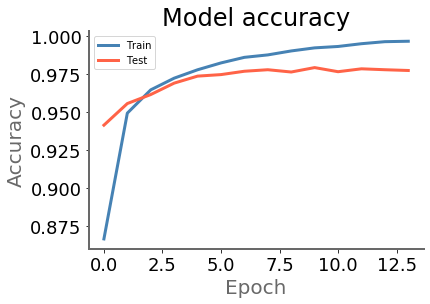

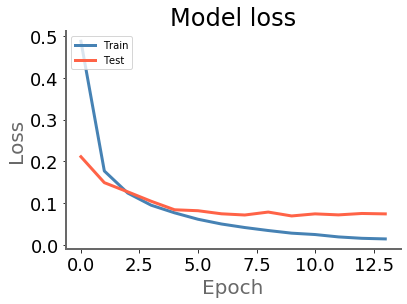

In [8]:
ooo.plot_history(history, figsize=(6,4), save_as="history")

## Confusion matrix

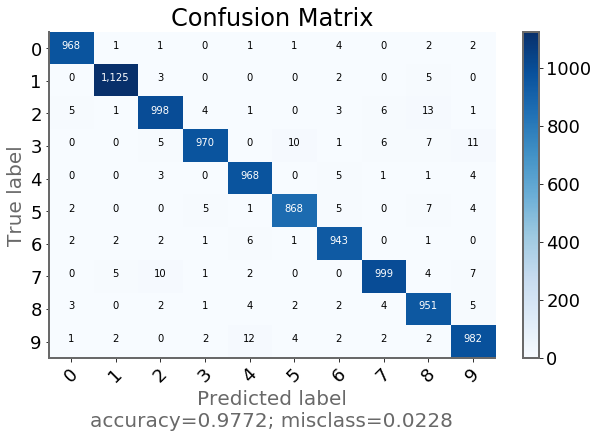

In [9]:
y_pred   = model.predict_classes(x_test)
conf_mat_op = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

with tf.Session():
    conf_mat = tf.Tensor.eval(conf_mat_op,feed_dict=None, session=None)

ooo.plot_confusion_matrix(cm       = conf_mat, 
                  normalize    = False,
                  target_names = range(10),
                  title        = "Confusion Matrix",
                  figsize      = (10,6) ,
                  save_as      = "Confusion-matrix")

## Errors

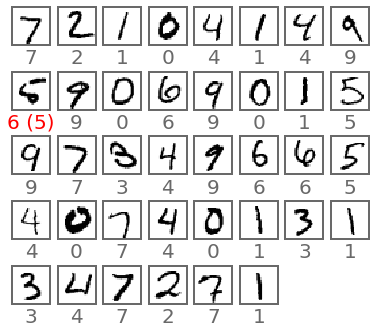

In [13]:
ooo.plot_images(x_test, y_test, range(0,38), columns=8, x_size=0.8, y_size=0.8, y_pred=y_pred, save_as="results")

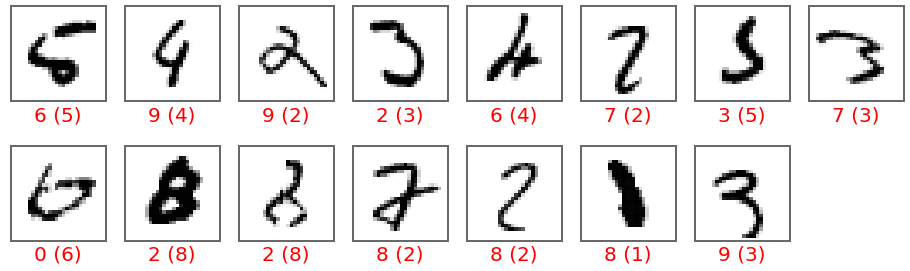

In [11]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
ooo.plot_images(x_test, y_test, errors[:15], columns=8, x_size=2, y_size=2, y_pred=y_pred)